## Obtención de datos

## BUSINESS PROBLEM

### **Definición del problema**

Fleca del Port, una cafetería degustación con productos de alta rotación, busca optimizar su planificación operativa y estratégica mediante la anticipación de sus ventas mensuales. Actualmente, las decisiones relacionadas con compras, personal y producción se toman de forma reactiva o basadas en intuiciones, lo que puede generar ineficiencias.

El objetivo principal del proyecto es **predecir el volumen de ventas mensual**, utilizando datos históricos de ventas y variables externas que puedan influir en la demanda, como:

- Temporadas del año (Semana Santa, verano, etc.).
- Familias de productos (bollería, panadería, bebidas...).
- Condiciones meteorológicas (especialmente días de lluvia).
- Festivos y fechas especiales.

### **Objetivo del proyecto**

Construir un modelo de machine learning que permita anticipar con precisión el importe mensual de ventas, facilitando una mejor toma de decisiones en áreas clave como:

- Producción y aprovisionamiento.
- Gestión de personal.
- Promociones estacionales.

### **Impacto esperado**

- **Reducción de desperdicio**: Ajuste más preciso de la producción diaria en base a la demanda esperada.
- **Optimización del stock**: Mejora en la planificación de compras, reduciendo excesos o roturas de stock.
- **Toma de decisiones basada en datos**: Apoyo en decisiones estratégicas y operativas con previsiones respaldadas por modelos analíticos.
- **Mejor planificación del equipo**: Adaptación de turnos y refuerzos en base a picos esperados de venta.
- **Incremento de rentabilidad**: Ajuste de recursos y acciones promocionales con base en predicciones fiables.

## Definición de los datos

Para abordar este proyecto se utilizarán datos propios del negocio, específicamente un histórico de ventas recopilado durante los últimos años. Este conjunto de datos contiene información detallada a nivel de producto, familia y fecha, lo cual permitirá comprender el comportamiento de las ventas y construir un modelo de predicción robusto y ajustado a la realidad del negocio.

### Fuente de los datos

- **Ubicación**: Carpeta `raw/` dentro del proyecto.
- **Formato**: `.parquet`
- **Archivos incluidos**:
  - `row_data_forecasting_2023-2025_02-00000000000000000000.parquet`
  - `row_data_forecasting_2023-2025_02-00000000000000000001.parquet`
  - `row_data_forecasting_2023-2025_02-00000000000000000002.parquet`

Estos archivos forman parte de un único dataset repartido en bloques, por lo que será necesario combinarlos al cargarlos para su posterior análisis.


### Variables disponibles

El dataset incluye, entre otras, las siguientes variables:

- `fecha`: fecha de la transacción.
- `num_factura`: número de factura asociado a la venta.
- `producto`: nombre o descripción del producto vendido.
- `familia`: categoría del producto (ej. bollería, panadería...).
- `cantidad`: número de unidades vendidas.
- `base_imponible`: importe neto sin impuestos.
- `total`: importe total con impuestos.

### Descripción general

Estos datos permitirán realizar un análisis detallado de la evolución temporal de las ventas, identificar patrones estacionales y evaluar el impacto de distintas categorías de productos a lo largo del tiempo. Esta comprensión será clave para la generación de variables explicativas y la mejora de la precisión del modelo predictivo.

### Consideraciones

- Los datos se almacenarán localmente en la carpeta `/data` del proyecto.
- Se llevará a cabo un proceso de limpieza y análisis exploratorio (EDA) previo al modelado.
- Algunos registros pueden contener valores faltantes o inconsistencias que deberán ser identificados y tratados adecuadamente antes de entrenar el modelo.




**Carga de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [ ]:
from google.colab import drive
import pandas as pd
import glob

# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde se encuentran los archivos en Google Drive (ajusta la ruta según tu estructura)
folder_path = "/content/drive/MyDrive/jordiquiroga.com/Workspace/mlops_project/data/raw/"  # Reemplaza con la ubicación real

# Obtener lista de archivos .parquet en la carpeta
file_list = glob.glob(folder_path + "*.parquet")

# Cargar y unir los archivos en un solo DataFrame
df = pd.concat([pd.read_parquet(file) for file in file_list], ignore_index=True)

# Mostrar las primeras filas del DataFrame
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fecha,n_factura,producto,familia,cantidad,base_imponible,total
0,2024-01-10,T/112704,2 CHURROS HORNO,BOLLERIA,1.0,1.18,1.3
1,2024-01-10,T/112704,2 CHURROS HORNO,BOLLERIA,1.0,1.18,1.3
2,2024-01-10,T/112691,7 CEREALES BUT. BLANCA,BOCADILLOS,1.0,2.18,2.4
3,2024-01-07,T/112299,7 CEREALES BUT. BLANCA,BOCADILLOS,1.0,2.18,2.4
4,2024-01-05,T/112051,7 CEREALES BUT. BLANCA,BOCADILLOS,1.0,2.18,2.4


In [3]:
# Revisar la estructura y tipos de datos
df.info()

# Ver estadísticas descriptivas de las columnas numéricas
df.describe()

# Comprobar valores nulos en el dataset
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295979 entries, 0 to 295978
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha           295979 non-null  object 
 1   n_factura       295979 non-null  object 
 2   producto        295979 non-null  object 
 3   familia         295978 non-null  object 
 4   cantidad        295979 non-null  float64
 5   base_imponible  293732 non-null  float64
 6   total           293732 non-null  float64
dtypes: float64(3), object(4)
memory usage: 15.8+ MB
fecha                0
n_factura            0
producto             0
familia              1
cantidad             0
base_imponible    2247
total             2247
dtype: int64


In [4]:
# Verificar valores nulos por columna en los datos originales
print("Valores nulos en los datos originales (df):")
print(df.isnull().sum())

# Ver porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos:")
print(df.isnull().mean() * 100)



Valores nulos en los datos originales (df):
fecha                0
n_factura            0
producto             0
familia              1
cantidad             0
base_imponible    2247
total             2247
dtype: int64

Porcentaje de valores nulos:
fecha             0.000000
n_factura         0.000000
producto          0.000000
familia           0.000338
cantidad          0.000000
base_imponible    0.759175
total             0.759175
dtype: float64


# **Identificar en qué meses y categorías se encuentran los valores nulos**

Para tomar una decisión informada sobre cómo imputar o eliminar los valores nulos, necesitamos responder dos preguntas clave:

**1. ¿En qué meses ocurren los valores nulos?**

Si los valores nulos están en períodos específicos, podríamos imputarlos con la media móvil o interpolación.
Si hay meses completos sin datos, podríamos evaluar si eliminarlos o imputarlos con el promedio de otros años.

**2. ¿En qué categorías ocurren los valores nulos?**

Si ciertos productos o categorías tienen valores nulos, podríamos usar la media de esa categoría en lugar de una imputación global.
Si los nulos afectan productos con pocas ventas, podríamos simplemente eliminarlos.

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'])


**Identificamos en qué meses hay valores nulos**

In [6]:
# Ver cuántos valores nulos hay por mes
df_nulos_mes = df[df.isnull().any(axis=1)].groupby(df['fecha'].dt.to_period("M")).size()

# Mostrar los meses con valores nulos
print("Valores nulos por mes:")
print(df_nulos_mes)



Valores nulos por mes:
fecha
2023-11    2247
2024-04       1
Freq: M, dtype: int64


**Identificamos en qué catégorías hay valores nulos**

In [7]:
# Ver cuántos valores nulos hay por categoría
df_nulos_categoria = df[df.isnull().any(axis=1)].groupby("familia").size()

# Mostrar las categorías con valores nulos
print("\nValores nulos por categoría:")
print(df_nulos_categoria)



Valores nulos por categoría:
familia
AÑADIDOS             11
BEBIDA               98
BEBIDAS              87
BOCADILLOS          329
BOLLERIA            426
CAFES               872
CERVEZAS             24
LICORES               8
PAN                 260
PASTELERIA           55
TES & INFUSIONES     44
TOSTADAS             21
VARIOS               12
dtype: int64


# Análisis de los valores nulos encontrados
Con los resultados, vemos las siguientes observaciones clave:

**1. Los valores nulos están concentrados en noviembre de 2023 (2247 registros)**

Esto podría deberse a un problema de carga de datos o falta de registros en ese mes.
Necesitamos decidir si imputamos esos valores o si hay una justificación para descartarlos.

**2. Un solo valor nulo en abril de 2024**

Este único caso no es problemático y podríamos simplemente eliminarlo sin afectar el análisis.

**3. Valores nulos en múltiples categorías**

Las categorías con más valores nulos son:
CAFÉS (872 registros)
BOLLERÍA (426 registros)
BOCADILLOS (329 registros)
PAN (260 registros)
Esto indica que las ventas de estos productos no se registraron correctamente en noviembre de 2023.


---



**Posibles Estrategias de Imputación**

Dado que los valores nulos están concentrados en un mes y afectan muchas categorías, tenemos tres estrategias posibles:

1. Imputación con la media de meses anteriores
Si asumimos que noviembre de 2023 sigue la misma estacionalidad que otros años, podemos imputar con el promedio de noviembre 2022 O noviembre 2024 (si ya hay datos de 2024).


```
# df.loc[df['fecha'].dt.to_period("M") == "2023-11", 'total'] = df[df['fecha'].dt.to_period("M").isin(["2022-11", "2024-11"])]['total'].mean()

```


2. Imputación con interpolación temporal
Si queremos suavizar la serie, podemos interpolar los valores nulos basándonos en los meses anteriores y posteriores.



```
# df['total'] = df['total'].interpolate(method='linear')

```

3. Imputación específica por categoría (Este es el que veo mejor)
Si las categorías tienen estacionalidades distintas, podemos imputar usando el promedio de cada categoría en meses cercanos.



```
# df['total'] = df.groupby(["familia", df['fecha'].dt.to_period("M")])['total'].transform(lambda x: x.fillna(x.mean()))

```




**Imputamos los valores nulos**

Dado que tenemos un mes entero con valores nulos, la mejor opción es imputar primero y luego detectar outliers.
Así evitamos que los datos faltantes distorsionen la detección de valores atípicos.

Vamos a rellenar los valores nulos utilizando la media de la categoría en meses cercanos, de la siguiente manera:

1. Para cada categoría con valores nulos, buscamos el promedio de las ventas en octubre y diciembre de 2023 (los meses más cercanos).

2. Si la categoría no tiene datos en esos meses, usamos la media de todo el año 2023.

3. Aplicamos la imputación y verificamos que no queden valores nulos.

In [ ]:
# Identificar los meses cercanos a noviembre 2023
meses_cercanos = ["2023-10", "2023-12"]

# Convertir a formato Periodo (mes-año) para facilitar la agrupación
df['mes'] = df['fecha'].dt.to_period("M")

# Imputar valores nulos usando la media de la categoría en meses cercanos
for categoria in df['familia'].unique():
    for mes in meses_cercanos:
        # Filtrar la media de la categoría en los meses cercanos
        media_categoria = df[(df['familia'] == categoria) & (df['mes'] == mes)]['total'].mean()

        # Rellenar valores nulos solo en noviembre 2023 de esa categoría
        df.loc[(df['familia'] == categoria) & (df['mes'] == "2023-11") & (df['total'].isnull()), 'total'] = media_categoria

# Si sigue habiendo valores nulos, usar la media anual de la categoría en 2023
df.loc[df['mes'] == "2023-11", 'total'] = df.groupby("familia")['total'].transform(lambda x: x.fillna(x.mean()))

# Verificar si quedan valores nulos
print("Valores nulos después de la imputación:")
print(df.isnull().sum())


Valores nulos después de la imputación:
fecha                0
n_factura            0
producto             0
familia              1
cantidad             0
base_imponible    2247
total                0
mes                  0
dtype: int64


In [9]:
# Imputar valores nulos en base_imponible usando la media de la categoría en meses cercanos
for categoria in df['familia'].unique():
    for mes in meses_cercanos:
        # Filtrar la media de la categoría en los meses cercanos
        media_base_categoria = df[(df['familia'] == categoria) & (df['mes'] == mes)]['base_imponible'].mean()

        # Rellenar valores nulos solo en noviembre 2023 de esa categoría
        df.loc[(df['familia'] == categoria) & (df['mes'] == "2023-11") & (df['base_imponible'].isnull()), 'base_imponible'] = media_base_categoria

# Si sigue habiendo valores nulos, usar la media anual de la categoría en 2023
df.loc[df['mes'] == "2023-11", 'base_imponible'] = df.groupby("familia")['base_imponible'].transform(lambda x: x.fillna(x.mean()))

# Verificar si quedan valores nulos
print("Valores nulos después de la imputación en base_imponible:")
print(df.isnull().sum())



Valores nulos después de la imputación en base_imponible:
fecha             0
n_factura         0
producto          0
familia           1
cantidad          0
base_imponible    0
total             0
mes               0
dtype: int64


**Eliminamos la Fila con Valores Nulos de Abril 2024 y para la columna familia**

In [10]:
# Eliminar cualquier fila que tenga un valor nulo en cualquier columna
df = df.dropna()

# Verificar que ya no haya valores nulos
print("Valores nulos después de eliminar la fila con nulos restantes:")
print(df.isnull().sum())



Valores nulos después de eliminar la fila con nulos restantes:
fecha             0
n_factura         0
producto          0
familia           0
cantidad          0
base_imponible    0
total             0
mes               0
dtype: int64


# Detección de Outliers en las Ventas

Usaremos tres métodos complementarios para identificar valores atípicos:

**1. Método de Cuartiles (IQR - Rango Intercuartílico)**  

Identifica valores fuera del rango esperado (Q1 - 1.5 * IQR y Q3 + 1.5 * IQR).

**2.  Método de Boxplot**

Visualiza los outliers con un gráfico de caja.

**3. Método de Z-Score**

Identifica valores con más de 2 o 3 desviaciones estándar de la media.

In [11]:
# Calcular cuartiles y IQR en los datos en bruto
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales de outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar outliers en los datos en bruto
outliers_iqr = df[(df['total'] < umbral_inferior) | (df['total'] > umbral_superior)]

# Mostrar los outliers detectados
print("Outliers detectados con IQR en los datos en bruto:")
print(outliers_iqr.head())



Outliers detectados con IQR en los datos en bruto:
         fecha n_factura                producto     familia  cantidad  \
96  2024-01-30  T/115351  7 CEREALES BUT. BLANCA  BOCADILLOS       2.0   
195 2024-01-09  T/112621      7 CEREALS FORMATGE  BOCADILLOS       2.0   
196 2024-01-24  T/114503      7 CEREALS FORMATGE  BOCADILLOS       2.0   
197 2024-03-08  T/120494      7 CEREALS FORMATGE  BOCADILLOS       2.0   
198 2024-02-21  T/118248      7 CEREALS FORMATGE  BOCADILLOS       2.0   

     base_imponible  total      mes  
96             4.64    5.1  2024-01  
195            4.36    4.8  2024-01  
196            4.64    5.1  2024-01  
197            4.64    5.1  2024-03  
198            4.64    5.1  2024-02  


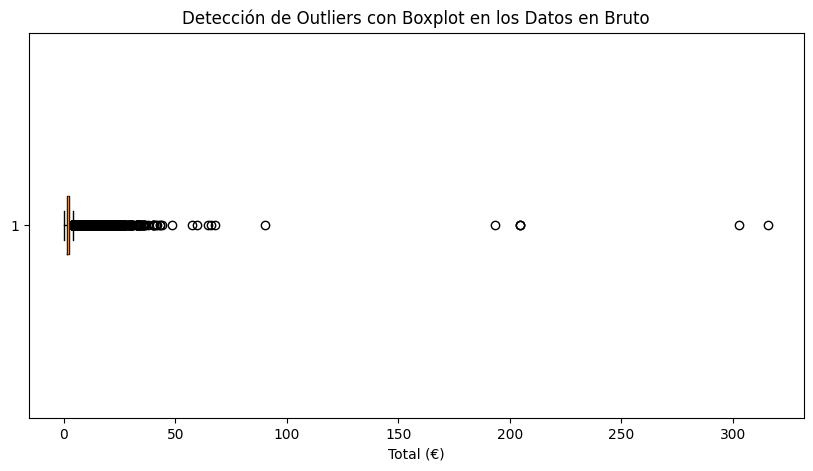

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.boxplot(df['total'], vert=False)
plt.xlabel("Total (€)")
plt.title("Detección de Outliers con Boxplot en los Datos en Bruto")
plt.show()



In [13]:
from scipy.stats import zscore
import numpy as np

# Calcular Z-Score para la columna de total en los datos en bruto
df['z_score'] = zscore(df['total'])

# Filtrar outliers con umbral de 3 desviaciones estándar
outliers_zscore = df[np.abs(df['z_score']) > 3]

# Mostrar los outliers detectados
print("Outliers detectados con Z-Score en los datos en bruto:")
print(outliers_zscore[['fecha', 'familia', 'producto', 'total', 'z_score']].head())


Outliers detectados con Z-Score en los datos en bruto:
          fecha     familia            producto  total   z_score
1823 2024-03-05  BOCADILLOS               BACON  10.00  4.143185
1877 2024-03-11  BOCADILLOS  BACON AMB FORMATGE   9.60  3.931044
1878 2024-03-16  BOCADILLOS  BACON AMB FORMATGE   9.60  3.931044
1879 2024-02-03  BOCADILLOS  BACON AMB FORMATGE  14.40  6.476725
3663 2024-03-10  PASTELERIA        BANDA FRUITA  20.95  9.950519


**Estrategia para Manejo de Outliers**

Dado que no existen productos de ticket alto en la cafetería de manera regular, pero sí en Semana Santa y posibles encargos, la mejor estrategia es:

**1. Eliminar outliers extremos que no correspondan a Semana Santa**

Si hay valores mayores a 50€ en meses normales, es probable que sean errores o pedidos excepcionales.

**2. Conservar valores altos en Semana Santa**

Si las ventas elevadas corresponden a marzo/abril (cuando ocurre Semana Santa), podemos mantenerlas.

**3. Revisar transacciones de más de 100€ en cualquier mes**

Si encontramos valores mayores a 100€ fuera de Semana Santa, investigamos si son tickets legítimos o errores.

In [15]:
# Definir los festivos (1 de enero y 25 de diciembre)
festivos = ['2023-01-01', '2023-12-25', '2024-01-01', '2024-12-25', '2025-01-01']
festivos = pd.to_datetime(festivos)

# Definir rango de Semana Santa (asumimos una duración típica)
semana_santa_2023 = pd.date_range('2023-04-02', '2023-04-09')
semana_santa_2024 = pd.date_range('2024-03-24', '2024-03-31')
semana_santa_2025 = pd.date_range('2025-04-13', '2025-04-20')
semana_santa = semana_santa_2023.union(semana_santa_2024).union(semana_santa_2025)

# Agregar una columna indicando si el mes contiene Semana Santa
df['semana_santa'] = df.index.to_series().apply(lambda x: x in semana_santa)

# Agregar una columna indicando si el mes contiene un festivo
df['festivo'] = df.index.to_series().apply(lambda x: x in festivos)

# Verificar los datos
print(df.head())


       fecha n_factura                producto     familia  cantidad  \
0 2024-01-10  T/112704         2 CHURROS HORNO    BOLLERIA       1.0   
1 2024-01-10  T/112704         2 CHURROS HORNO    BOLLERIA       1.0   
2 2024-01-10  T/112691  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   
3 2024-01-07  T/112299  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   
4 2024-01-05  T/112051  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   

   base_imponible  total      mes   z_score  semana_santa  festivo  
0            1.18    1.3  2024-01 -0.470862         False    False  
1            1.18    1.3  2024-01 -0.470862         False    False  
2            2.18    2.4  2024-01  0.112523         False    False  
3            2.18    2.4  2024-01  0.112523         False    False  
4            2.18    2.4  2024-01  0.112523         False    False  


In [16]:


# Marcar si una transacción pertenece a Semana Santa
df['es_semana_santa'] = df['fecha'].isin(semana_santa)

# Eliminar valores extremos solo si NO son de Semana Santa
df_filtrado = df[~((df['total'] > 50) & (df['es_semana_santa'] == False))]

# Verificar la cantidad de registros eliminados
print(f"Registros eliminados por ser outliers fuera de Semana Santa: {df.shape[0] - df_filtrado.shape[0]}")

# Mantener el dataset limpio
df = df_filtrado.drop(columns=['es_semana_santa'])


Registros eliminados por ser outliers fuera de Semana Santa: 6


In [17]:
import pandas as pd

# Asegurar que 'fecha' sea tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Agregar ventas a nivel mensual
df_monthly = df.groupby(df['fecha'].dt.to_period("M"))[['total']].sum()

# Convertir el índice a DatetimeIndex para evitar problemas con statsmodels
df_monthly.index = df_monthly.index.to_timestamp()

# Renombrar la columna para mayor claridad
df_monthly.rename(columns={'total': 'ventas_mensuales'}, inplace=True)

# Verificar que los datos estén correctos
print(df_monthly.head())



            ventas_mensuales
fecha                       
2023-01-01          20361.41
2023-02-01          17444.14
2023-03-01          21301.03
2023-04-01          28905.01
2023-05-01          25389.64


In [22]:
df_monthly.to_csv('ventas_mensuales.csv', index=True)

**Análisis de Autocorrelación de las Ventas Mensuales**

Vamos a calcular y visualizar la función de autocorrelación (ACF) para entender si las ventas tienen una dependencia temporal significativa.

1. Graficaremos la Autocorrelación (ACF) para ver la relación entre las ventas de distintos meses.
2. Graficaremos la Autocorrelación Parcial (PACF) para identificar qué rezagos influyen directamente en las ventas futuras.
3. Si hay fuerte autocorrelación en los primeros rezagos, la regresión lineal no será la mejor opción y consideraremos modelos como SARIMA.

<Figure size 1200x500 with 0 Axes>

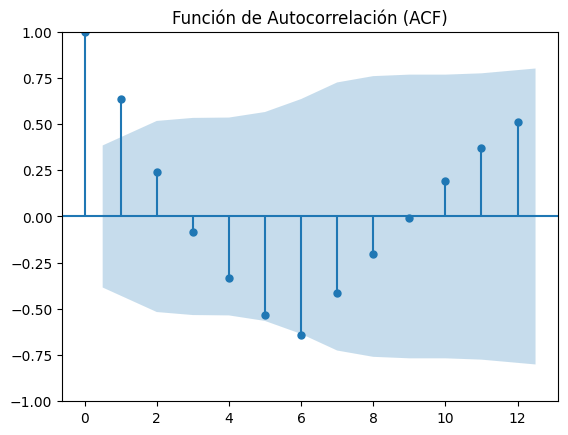

<Figure size 1200x500 with 0 Axes>

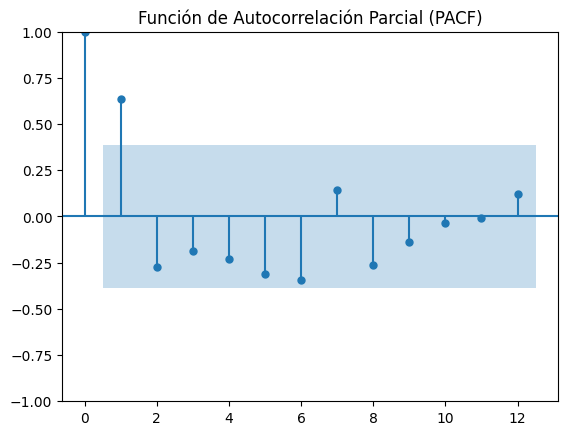

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la Autocorrelación (ACF)
plt.figure(figsize=(12, 5))
plot_acf(df_monthly['ventas_mensuales'], lags=12, title="Función de Autocorrelación (ACF)")
plt.show()

# Graficar la Autocorrelación Parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(df_monthly['ventas_mensuales'], lags=12, title="Función de Autocorrelación Parcial (PACF)")
plt.show()


**Interpretación de la Autocorrelación (ACF y PACF)**

**Autocorrelación (ACF)**

Observando las gráficas, podemos extraer las siguientes conclusiones clave:

1. Los primeros rezagos (1 y 2 meses) tienen una fuerte correlación positiva (> 0.5).

2. La autocorrelación cae lentamente en rezagos más lejanos, lo que indica dependencia temporal significativa.

¿Qué significa esto?

* Las ventas de un mes están fuertemente influenciadas por los meses anteriores.
* La regresión lineal podría no capturar bien este patrón porque no modela la dependencia temporal.
* SARIMA o modelos autorregresivos podrían ser más adecuados.

**Autocorrelación Parcial (PACF)**

1. Hay una fuerte correlación en el rezago 1 (~0.6), lo que indica que las ventas de un mes están influenciadas principalmente por el mes anterior.

2. Los rezagos posteriores tienen menor impacto, pero no desaparecen completamente.

¿Qué significa esto?

* El rezago 1 es el más importante, lo que indica que podemos probar un modelo AR(1) antes de considerar algo más complejo.
* SARIMA puede modelar este comportamiento de manera más precisa que la regresión lineal.

Dado que la serie tiene fuerte autocorrelación, la regresión lineal no es el modelo más adecuado.
📌 Mejor alternativa: Probar primero SARIMA antes que la regresión lineal.

# Análisis de la tendencia de ventas

**Análisis de la evolución de las ventas**

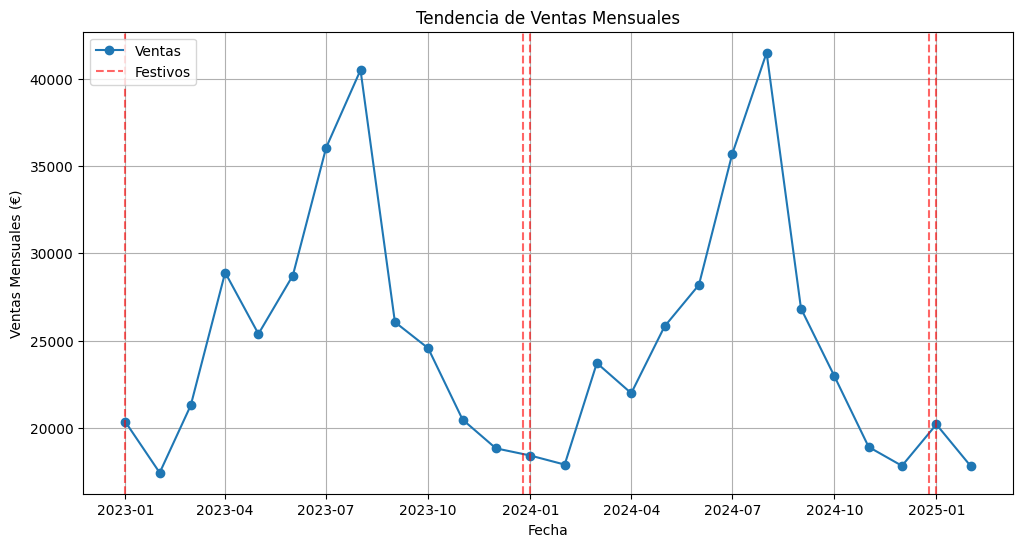

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], marker='o', linestyle='-')

# Marcar festivos en la gráfica
for fecha in festivos:
    plt.axvline(fecha, color='red', linestyle='--', alpha=0.6, label="Festivo" if fecha == festivos[0] else "")

plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales (€)')
plt.title('Tendencia de Ventas Mensuales')
plt.legend(['Ventas', 'Festivos'])
plt.grid()
plt.show()


**Análisis de la Tendencia de Ventas**

Observando la gráfica, podemos notar algunos patrones clave:

**1. Tendencia anual cíclica** 📈📉

Se observa un patrón de crecimiento sostenido hasta el tercer trimestre de cada año, seguido por una caída pronunciada en los últimos meses del año.
Esto sugiere que las ventas tienen una fuerte estacionalidad con picos en meses específicos.

**2. Efecto de los festivos **🎄

Las líneas rojas (festivos) parecen coincidir con caídas en las ventas, lo que confirma que los días 1 de enero y 25 de diciembre impactan negativamente las ventas.

**3. Picos en ciertos períodos** 📊

Semana Santa no está resaltada en la gráfica, pero podríamos esperar un aumento en esos meses. Vamos a verificar si los meses de marzo/abril muestran un comportamiento atípico.

También vemos picos en los meses de verano, lo cual podría estar relacionado con un aumento en el turismo o productos de temporada.


**Próximo Paso: Descomposición de la Serie Temporal**

Para confirmar que la estacionalidad es clara y que podemos modelarla, realizaremos una descomposición de la serie en tendencia, estacionalidad y residuo. Esto nos ayudará a decidir el mejor modelo de forecasting.

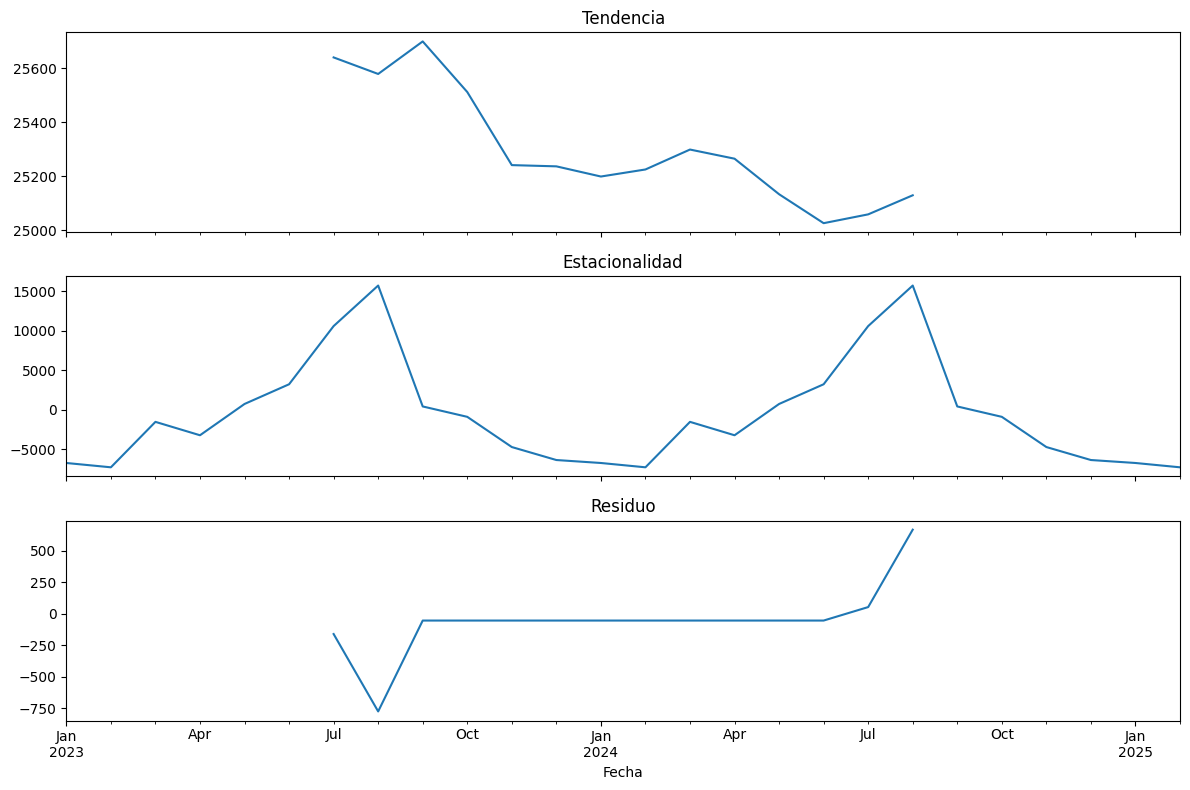

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
decomposition = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar los componentes
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

decomposition.trend.plot(ax=axes[0], title="Tendencia")
decomposition.seasonal.plot(ax=axes[1], title="Estacionalidad")
decomposition.resid.plot(ax=axes[2], title="Residuo")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


**Análisis de la Descomposición de la Serie Temporal**

Se observa un patrón anual claro: los valores suben hasta mitad de año (verano) y luego bajan, lo cual sugiere estacionalidad fuerte probablemente por comportamiento del consumidor (establecimiento en zona turística).


**1. Tendencia** 📈

Hay una tendencia ligeramente descendente desde mediados de 2023 hasta mediados de 2024, y luego una leve recuperación.

Se observan períodos de caída y recuperación, lo que indica posibles fluctuaciones estacionales.

**2. Estacionalidad** 🔄

El patrón estacional es claro y repetitivo:

* Aumenta significativamente en los meses de verano (junio-agosto).

* Disminuye en los primeros y últimos meses del año.

* El comportamiento estacional parece consistente entre años, lo cual es muy útil para el forecasting.

**3. Residuo ⚠️**

* El residuo es bastante bajo, lo que indica que la mayor parte de la variabilidad está explicada por la tendencia y la estacionalidad.

* No se observan outliers fuertes ni variaciones abruptas que rompan el modelo

✅ Conclusión

La serie es **altamente estacional y predecible**, con una leve tendencia negativa y residuos bajos. Es una muy buena candidata para modelos de forecasting basados en componentes como SARIMA, Prophet o modelos de ML con features temporales

**Análisis de la Evolución de Ventas por Categoría**

El objetivo es conocer cómo influyen las categorías en las ventas generales, ya que nos puede dar información clave para futuras mejoras del modelo.

Razones para hacer este análisis:
* Nos ayuda a entender si algunas categorías impulsan la estacionalidad de las ventas.
* Podemos identificar productos o familias clave que afectan los patrones de demanda.
* Nos permite decidir si en el futuro queremos modelar ventas por categoría, en lugar de solo ventas totales.

**Análisis de las ventas por categorías**

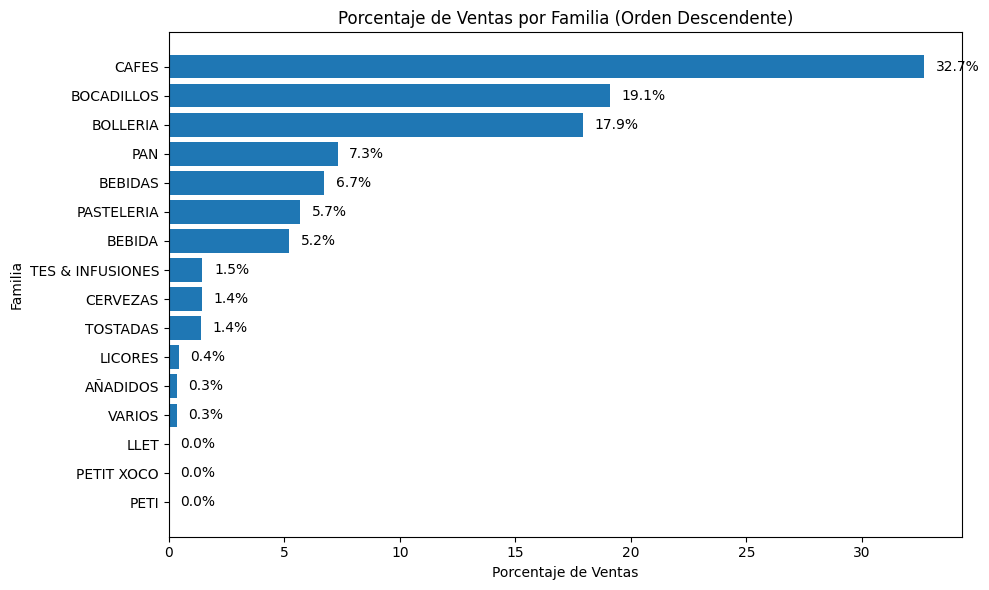

In [29]:
#  Calcular las ventas totales por familia
ventas_por_familia = df.groupby('familia')['total'].sum().reset_index()

# Calcular el porcentaje de ventas por familia
ventas_por_familia['porcentaje'] = (ventas_por_familia['total'] / ventas_por_familia['total'].sum()) * 100

#Ordenar el DataFrame por porcentaje de ventas
ventas_por_familia = ventas_por_familia.sort_values(by=['porcentaje'], ascending=True)

# Crear el gráfico de barras horizontal
import matplotlib.pyplot as plt

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(ventas_por_familia['familia'], ventas_por_familia['porcentaje'])  # Usamos barh para barras horizontales
plt.xlabel('Porcentaje de Ventas')
plt.ylabel('Familia')
plt.title('Porcentaje de Ventas por Familia (Orden Descendente)')

# Añadir etiquetas con el porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

CAFÉS, BOCADILLOS y BOLLERÍA deben ser monitoreados de cerca, ya que representan el 69% de los ingresos.

<Figure size 1400x600 with 0 Axes>

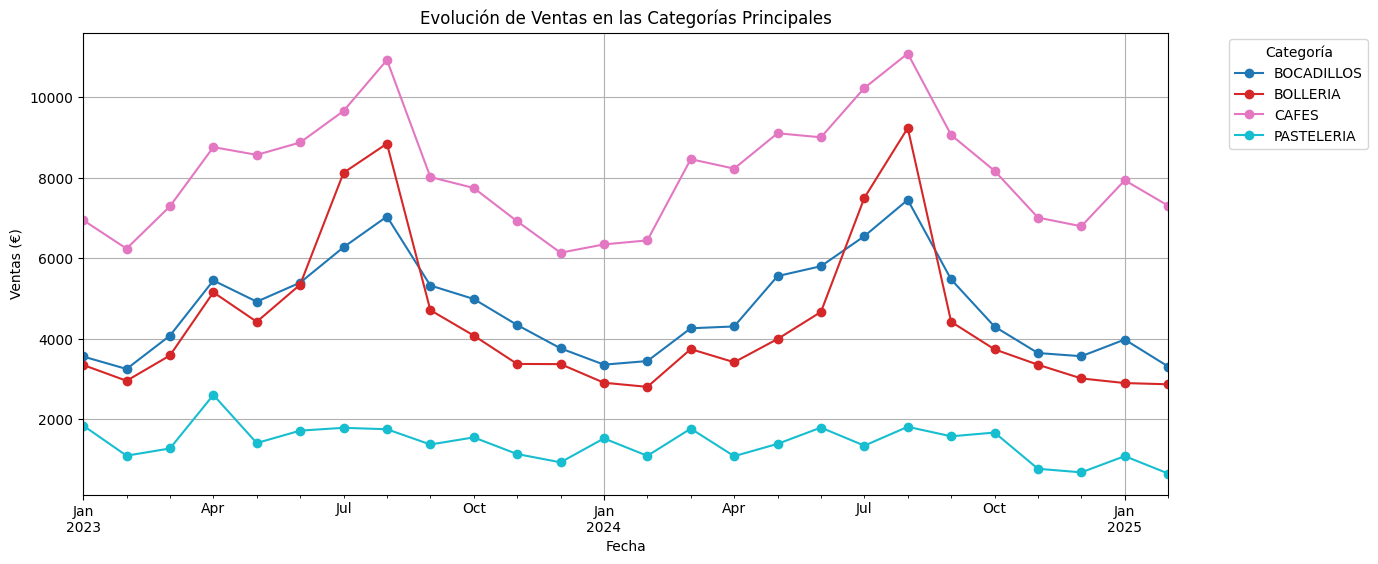

In [30]:
import matplotlib.pyplot as plt

# Seleccionar las principales categorías según el análisis previo
categorias_principales = ["CAFES", "BOCADILLOS", "BOLLERIA", "PASTELERIA"]

# Agregar ventas mensuales por categoría
df_categorias_principales = df[df['familia'].isin(categorias_principales)].groupby([df['fecha'].dt.to_period("M"), 'familia'])['total'].sum().unstack()

# Convertir el índice a DatetimeIndex
df_categorias_principales.index = df_categorias_principales.index.to_timestamp()

# Graficar la evolución de ventas por categoría
plt.figure(figsize=(14, 6))
df_categorias_principales.plot(kind="line", marker="o", figsize=(14,6), colormap="tab10")


plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.title("Evolución de Ventas en las Categorías Principales")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



1. Todas las categorías siguen un patrón estacional claro

* Se observa una fuerte subida en primavera y verano, con picos en abril y julio/agosto.
* Luego, las ventas tienden a caer en otoño e invierno, especialmente entre noviembre y enero.

2. PASTELERÍA tiene un pico pronunciado en Semana Santa

* Se confirma que en marzo/abril, cuando ocurre Semana Santa, hay un fuerte aumento en ventas.


** Prueba de Estacionariedad (Dickey-Fuller)**



In [31]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller
result = adfuller(df_monthly['ventas_mensuales'])

# Mostrar los resultados
print("Prueba de Dickey-Fuller:")
print(f"Estadístico ADF: {result[0]}")
print(f"P-valor: {result[1]}")
print("Valores Críticos:")
for key, value in result[4].items():
    print(f"{key}: {value}")

# Interpretación del resultado
if result[1] < 0.05:
    print("\n✅ La serie es estacionaria (podemos probar ARIMA).")
else:
    print("\n⚠️ La serie NO es estacionaria (necesitamos diferenciación o SARIMA).")


Prueba de Dickey-Fuller:
Estadístico ADF: -3.6072555608562116
P-valor: 0.005623822427835475
Valores Críticos:
1%: -3.9240193847656246
5%: -3.0684982031250003
10%: -2.67389265625

✅ La serie es estacionaria (podemos probar ARIMA).


# Resumen del Análisis y Elección del Modelo (ARIMA vs. SARIMA)
Hemos realizado un análisis completo de la serie de ventas de la cafetería "Fleca del Port". A continuación, recapitulamos los puntos clave y justificamos qué modelo es el más adecuado.

**Resumen de los Análisis Realizados**

1. Exploración de los Datos
* Estructura de los datos: Ventas diarias con variables como fecha, familia, producto, total, etc.
* Preprocesamiento: Se agregaron las ventas a nivel mensual (df_monthly).
* Valores nulos: Se imputaron valores por la media de categorías cercanas y se eliminó un único registro residual.
* Outliers: Se detectaron valores extremos, eliminando solo los fuera de contexto (ej. fuera de Semana Santa).

2. Análisis Exploratorio de Datos (EDA)
* Tendencia de ventas: Se identificó un patrón de aumento en primavera y verano, y caída en otoño/invierno.
* Análisis por categoría: Se determinó que CAFÉS, BOCADILLOS y BOLLERÍA son los principales motores de ventas, y PASTELERÍA presenta picos en Semana Santa.
* Autocorrelación (ACF/PACF): Se observó una fuerte dependencia temporal entre los meses previos y las ventas actuales.

3. Prueba de Estacionariedad (Dickey-Fuller)
* La serie es estacionaria, ya que la prueba de Dickey-Fuller arrojó un p-valor < 0.05.
* No se requiere diferenciación adicional en la tendencia, pero esto NO implica que no haya estacionalidad.

4. Análisis de Estacionalidad
* Se identificó una fuerte estacionalidad con picos en Semana Santa y verano.
* ACF mostró autocorrelación en múltiplos de 12 meses, indicando que la estacionalidad es significativa.

**¿Qué Modelo Encaja Mejor? (ARIMA vs. SARIMA)**

✅ SARIMA es el modelo más adecuado porque nuestra serie tiene una estacionalidad clara (picos en Semana Santa y verano), que ARIMA no puede modelar directamente.



In [32]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
# (p, d, q) son los parámetros del modelo ARIMA estándar
# (P, D, Q)m son los parámetros del componente estacional
# m es el período de la estacionalidad (12 para datos mensuales)

# Ejemplo de parámetros:
order = (1, 0, 1)  # ARIMA(1, 0, 1)
seasonal_order = (1, 1, 1, 12)  # SARIMA(1, 1, 1, 12)

In [35]:
modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'],
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()
print(modelo_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   ventas_mensuales   No. Observations:                   26
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 22 Mar 2025   AIC                             10.000
Time:                                    11:52:53   BIC                               -inf
Sample:                                01-01-2023   HQIC                               nan
                                     - 02-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1495        nan        nan        nan         nan         nan
ma.L1         -0.1512        nan   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(

Los resultados muestran algunos problemas, ya que muchos valores son nan (Not a Number). Esto indica que el modelo no ha podido converger correctamente o que hay algún problema con los datos.

1. Insuficiencia de datos:
Con solo 26 observaciones, es posible que no haya suficientes datos para que SARIMA funcione correctamente.

2. Estacionalidad no identificada correctamente: La estacionalidad puede no estar bien especificada en los parámetros del modelo.

Solución: Experimenta con diferentes valores para los parámetros estacionales (P, D, Q, m) en seasonal_order. Puedes utilizar la función seasonal_decompose de statsmodels para visualizar la estacionalidad y obtener una mejor idea del período y la forma de la estacionalidad.

Problemas de convergencia: El modelo puede tener dificultades para converger a una solución óptima debido a la complejidad de SARIMA o a la naturaleza de los datos.

Solución: Intenta cambiar el optimizador utilizado por SARIMA usando el argumento method en la función fit. También puedes ajustar la tolerancia de convergencia con el argumento tol.
Valores atípicos o datos erróneos: Los valores atípicos o los datos erróneos pueden afectar la estimación del modelo.

Solución: Revisa tus datos para detectar valores atípicos o errores. Si los encuentras, corrígelos o elimínalos si es apropiado.
Recomendaciones:

Revisa la descomposición de la serie: Realiza una descomposición de la serie temporal utilizando seasonal_decompose para visualizar la tendencia, la estacionalidad y los residuos. Esto te ayudará a comprender mejor la estructura de tus datos y a identificar posibles problemas.

Simplifica el modelo: Si SARIMA no converge, intenta simplificar el modelo reduciendo el número de parámetros. Puedes comenzar con un modelo ARIMA simple sin componentes estacionales y luego agregar la estacionalidad gradualmente.

Considera otras alternativas: Si SARIMA sigue sin converger o no proporciona resultados satisfactorios, puedes considerar otras alternativas como Prophet, modelos de suavizado exponencial o modelos de Machine Learning.

Ejemplo de cómo cambiar el optimizador:


modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'], order=order, seasonal_order=seasonal_order).fit(method='nm') # Usar el optimizador Nelder-Mead
Use code with caution
Recuerda que la modelización de series temporales puede ser un proceso iterativo, y es posible que tengas que probar diferentes enfoques antes de encontrar el modelo que mejor se ajuste a tus datos.

Espero que esta información te sea útil. ¡No dudes en seguir preguntando si necesitas más ayuda!

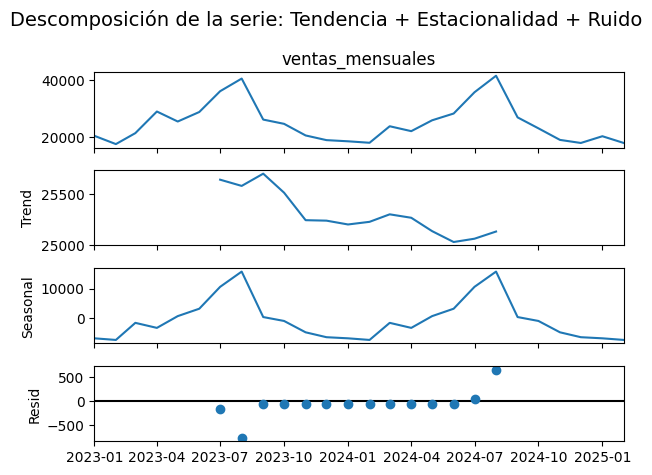

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie (modelo aditivo, frecuencia mensual)
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposición
result.plot()
plt.suptitle("Descomposición de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

In [37]:
import itertools

# Definir rangos de valores para los parámetros estacionales
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Generar todas las combinaciones posibles de parámetros
seasonal_orders = list(itertools.product(p_values, d_values, q_values))

# Ajustar modelos SARIMA con diferentes seasonal_orders y guardar los resultados
resultados = []
for seasonal_order in seasonal_orders:
    try:
        modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'], order=(1, 0, 1), seasonal_order=seasonal_order + (12,)).fit()
        resultados.append([seasonal_order, modelo_sarima.aic])
    except:
        continue

# Encontrar el mejor modelo según el AIC
mejor_modelo = min(resultados, key=lambda x: x[1])
print(f"Mejor seasonal_order: {mejor_modelo[0]}, AIC: {mejor_modelo[1]}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

Mejor seasonal_order: (0, 1, 0), AIC: 259.82441806204196


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 12)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


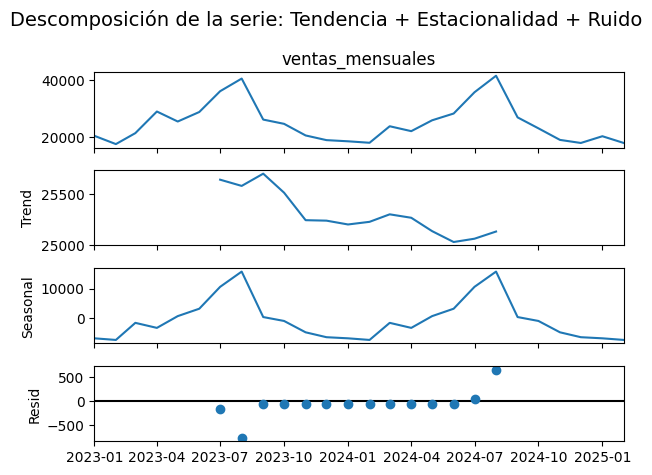

<ipython-input-42-0e701136fd18>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
<ipython-input-42-0e701136fd18>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
<ipython-input-42-0e701136fd18>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura


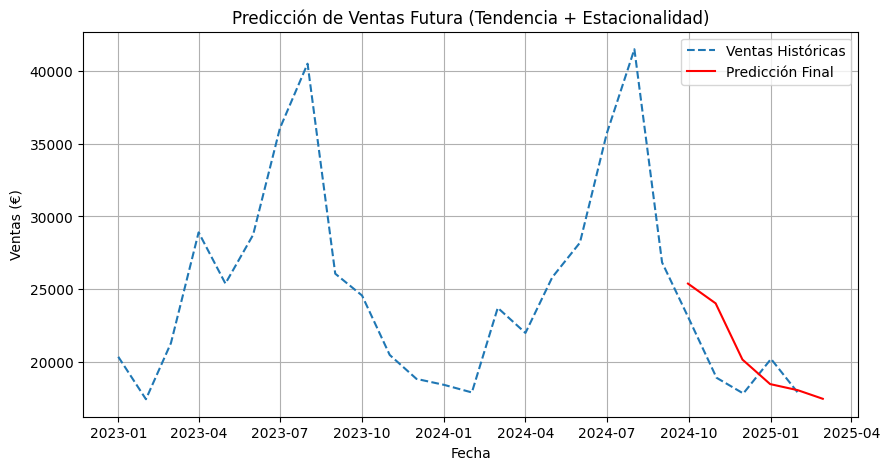

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Descomponer la serie:
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposición
result.plot()
plt.suptitle("Descomposición de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

# 2. Modelar la tendencia con regresión lineal:
df_tendencia = tendencia.dropna()
X = np.arange(len(df_tendencia)).reshape(-1, 1)
y = df_tendencia.values

modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)

# Predecir la tendencia futura (ej. para los próximos 6 meses)
meses_futuros = 6
X_pred = np.arange(len(df_tendencia), len(df_tendencia) + meses_futuros).reshape(-1, 1)
y_pred = modelo_tendencia.predict(X_pred)

# 3. Modelar la estacionalidad:
# Calcular la estacionalidad promedio por mes
estacionalidad_promedio = estacionalidad.groupby(estacionalidad.index.month).mean()

# Construir la estacionalidad futura repitiendo los valores promedio por mes
# (Asegúrate de que las fechas futuras coincidan con el índice de la predicción de tendencia)
estacionalidad_futura = pd.Series(
    [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
    index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
)

# 4. Combinar las predicciones:
prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura

# 5. Graficar la predicción final:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Históricas", linestyle="dashed")
plt.plot(prediccion_final.index, prediccion_final, label="Predicción Final", color="red")
plt.title("Predicción de Ventas Futura (Tendencia + Estacionalidad)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()

al mirar la predicción para enero de 2025, se nota que el modelo subestima ligeramente las ventas en ese punto, o al menos rompe el patrón estacional que sí respetó en otros meses.

*Análisis técnico:*
Estacionalidad promedio mensual:

Tu estacionalidad se basa en el promedio de cada mes, y probablemente enero tiene pocos datos históricos (solo enero 2023 y 2024).

Si alguno de esos meses tuvo ventas anómalamente bajas, el promedio para enero será más bajo de lo que realmente debería ser.

*Predicción lineal de la tendencia:*

Al tratarse de una regresión lineal simple, la tendencia sigue bajando indefinidamente.

El problema es que enero marca el cambio de ciclo estacional (piso del ciclo), y la tendencia baja + estacionalidad baja combinan en un mínimo que quizás no sea realista.

*Alineación de fechas:*

Si el índice de la tendencia y el índice de la estacionalidad no están perfectamente alineados, la suma puede estar usando un valor de estacionalidad que no corresponde a enero.

Mejora:
✅ Usar más años de datos
✅ Revisar manualmente el valor de estacionalidad_futura[enero]
✅ Ajustar la tendencia con un modelo no lineal
✅ Usar Prophet, o un modelo de machine learning



In [43]:
print(estacionalidad_futura['2025-01'])


2025-01-31   -6716.187225
Freq: ME, dtype: float64


In [44]:
print(estacionalidad['2023-01'])
print(estacionalidad['2024-01'])


fecha
2023-01-01   -6716.187225
Freq: MS, Name: seasonal, dtype: float64
fecha
2024-01-01   -6716.187225
Freq: MS, Name: seasonal, dtype: float64


Probamos con un modelo polinomial, pero no quizás por los pocos datos que tenemos, no muestra diferencias.

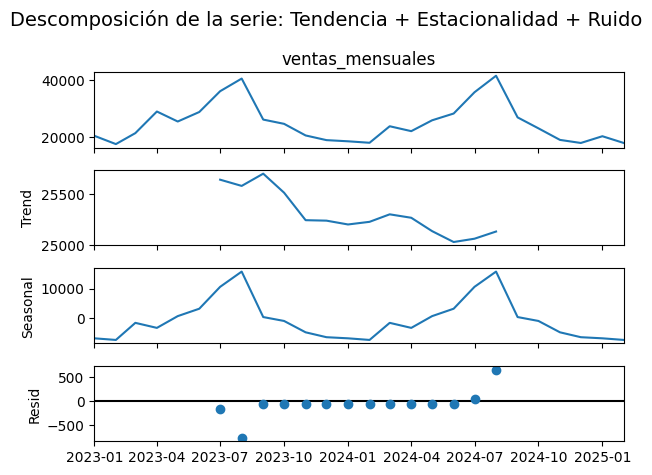

<ipython-input-45-bd077ad08574>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
<ipython-input-45-bd077ad08574>:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
<ipython-input-45-bd077ad08574>:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura


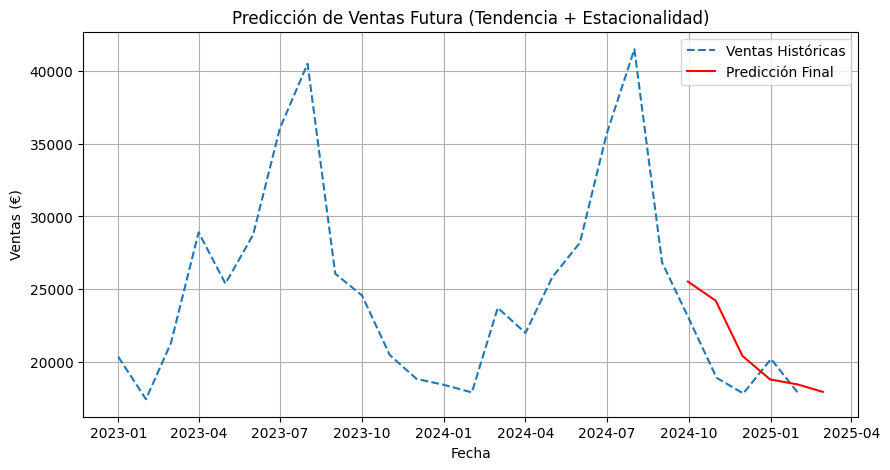

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Descomponer la serie:
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposición
result.plot()
plt.suptitle("Descomposición de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

# 2. Modelar la tendencia con regresión polinomial:
df_tendencia = tendencia.dropna()
X = np.arange(len(df_tendencia)).reshape(-1, 1)
y = df_tendencia.values

# Ajustar modelo de regresión polinómica (grado 2)
modelo_polinomial = make_pipeline(PolynomialFeatures(2), LinearRegression())
modelo_polinomial.fit(X, y)

# Predecir la tendencia futura (ej. para los próximos 6 meses)
meses_futuros = 6
X_pred = np.arange(len(df_tendencia), len(df_tendencia) + meses_futuros).reshape(-1, 1)
y_pred = modelo_polinomial.predict(X_pred)

# 3. Modelar la estacionalidad:
# Calcular la estacionalidad promedio por mes
estacionalidad_promedio = estacionalidad.groupby(estacionalidad.index.month).mean()

# Construir la estacionalidad futura repitiendo los valores promedio por mes
# (Asegúrate de que las fechas futuras coincidan con el índice de la predicción de tendencia)
estacionalidad_futura = pd.Series(
    [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
    index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
)

# 4. Combinar las predicciones:
prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura

# 5. Graficar la predicción final:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Históricas", linestyle="dashed")
plt.plot(prediccion_final.index, prediccion_final, label="Predicción Final", color="red")
plt.title("Predicción de Ventas Futura (Tendencia + Estacionalidad)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()

MAE  = 2,156.33
MSE  = 4,786,242.44
RMSE = 2,187.75
R^2  = -2.3445


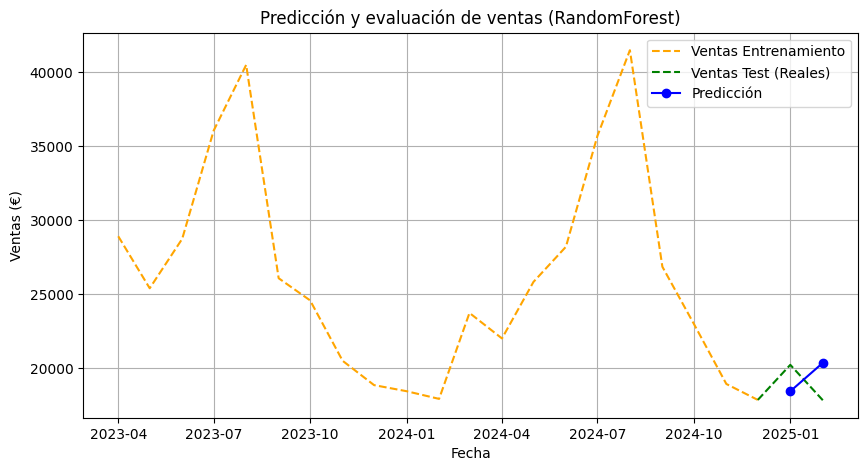

Métricas de error en el periodo de test:
MAE  = 2,156.33
MSE  = 4,786,242.44
RMSE = 2,187.75
R^2  = -2.3445


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===================================
# 1) PREPARAR DATASET (train y test)
# ===================================

# Suponiendo que ya tienes df_monthly con TODAS las ventas (históricas + reales posteriores)
# Ejemplo: df_monthly = pd.read_csv("ventas_mensuales.csv", parse_dates=["fecha"], index_col="fecha")

# Creamos features
df_monthly["mes"] = df_monthly.index.month
df_monthly["año"] = df_monthly.index.year
df_monthly["mes_seno"] = np.sin(2 * np.pi * df_monthly["mes"] / 12)
df_monthly["mes_coseno"] = np.cos(2 * np.pi * df_monthly["mes"] / 12)
df_monthly["lag_1"] = df_monthly["ventas_mensuales"].shift(1)
df_monthly["lag_2"] = df_monthly["ventas_mensuales"].shift(2)
df_monthly["rolling_mean_3"] = df_monthly["ventas_mensuales"].shift(1).rolling(3).mean()

df_modelo = df_monthly.dropna()

# Definimos fecha de corte: entrenar hasta 2024-10, test desde 2024-11 en adelante
cutoff_date = "2024-12-01"
df_train = df_modelo.loc[:cutoff_date].copy()
df_test = df_modelo.loc[cutoff_date:].copy()  # Aquí deberían estar los datos reales nov-2024+ (si existen)

X_train = df_train[["año", "mes_seno", "mes_coseno", "lag_1", "lag_2", "rolling_mean_3"]]
y_train = df_train["ventas_mensuales"]

# ===================================
# 2) ENTRENAR MODELO
# ===================================
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# ===================================
# 3) PREDECIR ITERATIVAMENTE (NOV-2024 A LO QUE TENGAS DE TEST)
# ===================================
start_date = pd.to_datetime("2025-01-01")  # Primer mes de predicción
end_date = df_test.index[-1]               # Último mes que tenemos en test
fechas_futuras = pd.date_range(start=start_date, end=end_date, freq="MS")

# Arrancamos "historico" con df_train (solo la parte de ventas)
historico = df_train[["ventas_mensuales"]].copy()
predicciones = []

for fecha in fechas_futuras:
    mes = fecha.month
    año = fecha.year
    seno = np.sin(2 * np.pi * mes / 12)
    coseno = np.cos(2 * np.pi * mes / 12)

    lag_1 = historico["ventas_mensuales"].iloc[-1]
    lag_2 = historico["ventas_mensuales"].iloc[-2]
    rolling_mean = historico["ventas_mensuales"].iloc[-3:].mean()

    X_futuro = pd.DataFrame([[año, seno, coseno, lag_1, lag_2, rolling_mean]],
                            columns=["año", "mes_seno", "mes_coseno", "lag_1", "lag_2", "rolling_mean_3"])

    y_pred = modelo_rf.predict(X_futuro)[0]
    predicciones.append([fecha, y_pred])

    # Añadimos la predicción al historico para el siguiente mes
    historico.loc[fecha, "ventas_mensuales"] = y_pred

# Creamos un DataFrame con las predicciones
df_pred = pd.DataFrame(predicciones, columns=["fecha", "pred_ventas"]).set_index("fecha")

# ===================================
# 4) CALCULAR MÉTRICAS DE ERROR
# ===================================
# Unimos df_test con df_pred en las fechas de predicción
df_eval = df_test.merge(df_pred, left_index=True, right_index=True, how="inner")

y_true = df_eval["ventas_mensuales"]  # Ventas reales en test
y_hat = df_eval["pred_ventas"]        # Predicciones

mae = mean_absolute_error(y_true, y_hat)
mse = mean_squared_error(y_true, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_hat)

print(f"MAE  = {mae:,.2f}")
print(f"MSE  = {mse:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R^2  = {r2:,.4f}")

# ===================================
# 5) GRAFICAR
# ===================================
plt.figure(figsize=(10, 5))

# Entrenamiento
plt.plot(df_train.index, df_train["ventas_mensuales"], label="Ventas Entrenamiento", color="orange", linestyle="dashed")

# Test (reales)
plt.plot(df_test.index, df_test["ventas_mensuales"], label="Ventas Test (Reales)", color="green", linestyle="dashed")

# Predicciones
plt.plot(df_pred.index, df_pred["pred_ventas"], label="Predicción", color="blue", marker='o')

plt.title("Predicción y evaluación de ventas (RandomForest)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()

print("Métricas de error en el periodo de test:")
print(f"MAE  = {mae:,.2f}")
print(f"MSE  = {mse:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R^2  = {r2:,.4f}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r_hil8c/wlquu54m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r_hil8c/6o1fdrr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66967', 'data', 'file=/tmp/tmp7r_hil8c/wlquu54m.json', 'init=/tmp/tmp7r_hil8c/6o1fdrr_.json', 'output', 'file=/tmp/tmp7r_hil8c/prophet_model0o3h4uhu/prophet_model-20250322130800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:

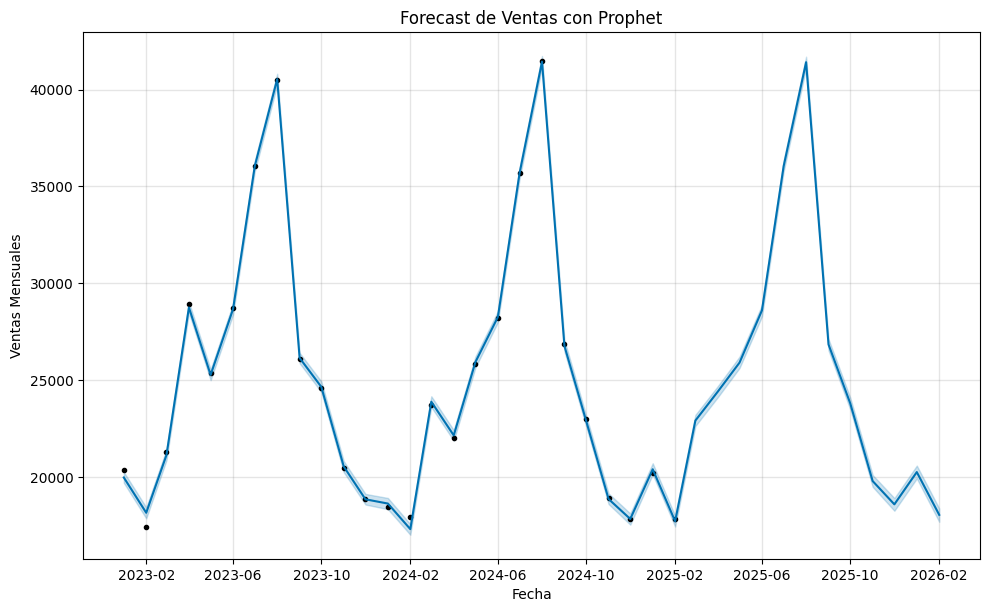

Tabla de Forecast (últimos 12 meses):
           ds          yhat    yhat_lower    yhat_upper
26 2025-03-01  22913.561494  22633.485799  23209.930723
27 2025-04-01  24409.922404  24118.765329  24693.851107
28 2025-05-01  25904.590318  25627.335821  26215.445336
29 2025-06-01  28602.475437  28288.724718  28879.390970
30 2025-07-01  36048.875982  35767.596604  36350.494693
31 2025-08-01  41412.142849  41123.068621  41699.735809
32 2025-09-01  26840.338068  26531.057643  27120.868783
33 2025-10-01  23802.915773  23490.286682  24098.107199
34 2025-11-01  19790.341706  19491.598636  20102.454630
35 2025-12-01  18588.287816  18256.509745  18911.317375
36 2026-01-01  20253.874929  19923.641970  20589.885324
37 2026-02-01  18045.020269  17683.426617  18379.630846


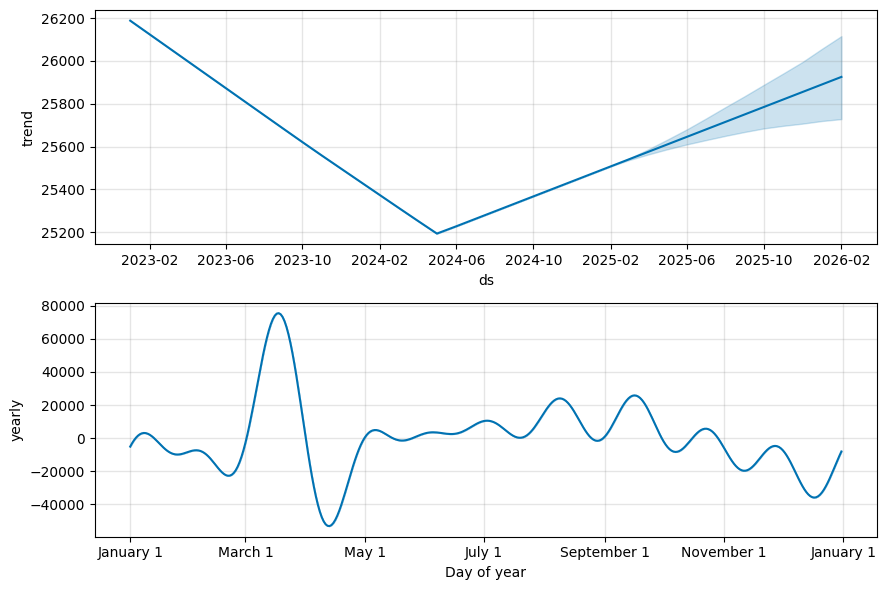

Tabla de Componentes (últimos 12 meses):
           ds         trend        yearly
26 2025-03-01  25539.916647  -2626.355153
27 2025-04-01  25575.376819  -1165.454415
28 2025-05-01  25609.693115    294.897203
29 2025-06-01  25645.153288   2957.322149
30 2025-07-01  25679.469584  10369.406397
31 2025-08-01  25714.929757  15697.213092
32 2025-09-01  25750.389929   1089.948139
33 2025-10-01  25784.706226  -1981.790452
34 2025-11-01  25820.166398  -6029.824692
35 2025-12-01  25854.482694  -7266.194878
36 2026-01-01  25889.942867  -5636.067938
37 2026-02-01  25925.403040  -7880.382771


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ---------------------------
# 1. Preparar los datos para Prophet
# ---------------------------
# Si ya tienes df_monthly, se convierte al formato que requiere Prophet:
df_prophet = df_monthly.reset_index()[["fecha", "ventas_mensuales"]].rename(columns={"fecha": "ds", "ventas_mensuales": "y"})
df_prophet = df_prophet.sort_values("ds")

# ---------------------------
# 2. Entrenar el modelo Prophet
# ---------------------------
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

# ---------------------------
# 3. Generar el DataFrame futuro y hacer predicción
# ---------------------------
# Generamos un futuro de 12 meses; 'freq="MS"' asegura fechas en el inicio de cada mes.
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

# ---------------------------
# 4. Graficar el forecast y mostrar tabla de datos
# ---------------------------
fig1 = m.plot(forecast)
plt.title("Forecast de Ventas con Prophet")
plt.xlabel("Fecha")
plt.ylabel("Ventas Mensuales")
plt.show()

# Mostrar una tabla con los datos del forecast (últimos 12 meses, por ejemplo)
forecast_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print("Tabla de Forecast (últimos 12 meses):")
print(forecast_table)

# ---------------------------
# 5. Graficar los componentes y mostrar tablas de componentes
# ---------------------------
fig2 = m.plot_components(forecast)
plt.show()

# Podemos mostrar una tabla con algunos componentes importantes, por ejemplo: trend y yearly
components_table = forecast[['ds', 'trend', 'yearly']].tail(12)
print("Tabla de Componentes (últimos 12 meses):")
print(components_table)





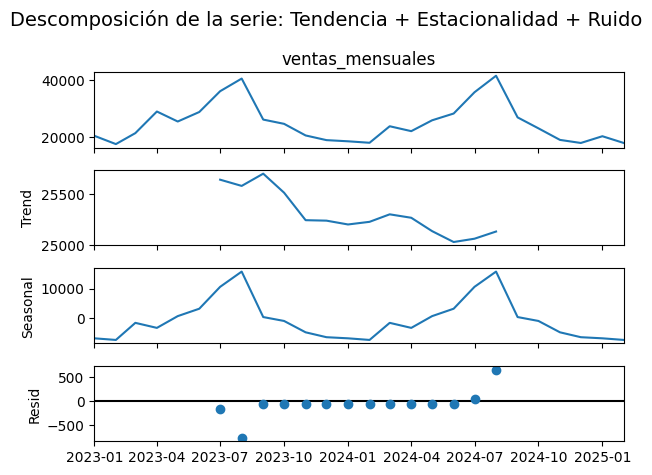

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie (modelo aditivo, frecuencia mensual)
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposición
result.plot()
plt.suptitle("Descomposición de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid





<ipython-input-67-0c92f1d07661>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:], y_pred, label="Predicción", color="red")


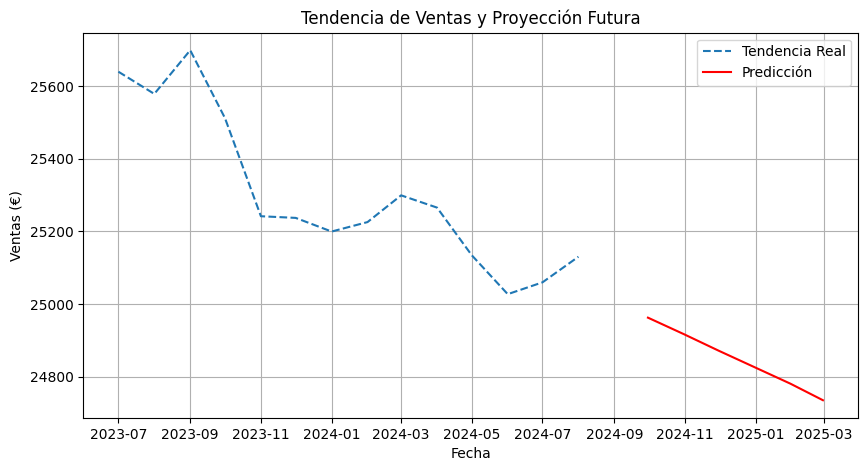

<ipython-input-67-0c92f1d07661>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Preparar los datos para regresión
df_tendencia = tendencia.dropna()  # Eliminar valores NaN
X = np.arange(len(df_tendencia)).reshape(-1, 1)  # Índice temporal como variable independiente
y = df_tendencia.values  # Valores de tendencia

# Ajustar un modelo de regresión lineal
modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)

# Predecir la tendencia futura para los próximos 6 meses
meses_futuros = 6
X_pred = np.arange(len(df_tendencia), len(df_tendencia) + meses_futuros).reshape(-1, 1)
y_pred = modelo_tendencia.predict(X_pred)

# Graficar la tendencia ajustada y proyectada
plt.figure(figsize=(10, 5))
plt.plot(df_tendencia.index, df_tendencia, label="Tendencia Real", linestyle="dashed")
plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:], y_pred, label="Predicción", color="red")
plt.title("Tendencia de Ventas y Proyección Futura")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()

# Guardar la tendencia futura para la predicción final
df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:])


La tendencia futura (línea roja) está en descenso constante, lo que parece demasiado agresivo y posiblemente no representa bien la realidad.

🔎 Diagnóstico: ¿Por qué la tendencia cae tan fuerte?
1️⃣ La regresión lineal está ajustando la tendencia completa, incluyendo caídas previas

Parece que los meses finales de la tendencia tienen un descenso fuerte, lo que está arrastrando la proyección hacia abajo.
2️⃣ Posible solución: Ajustar la regresión solo con datos más recientes

En lugar de entrenar con toda la serie, podemos usar solo los últimos 12-18 meses para evitar que caídas pasadas afecten demasiado la proyección.
✅ Solución: Ajustar la regresión solo con los últimos 12 meses

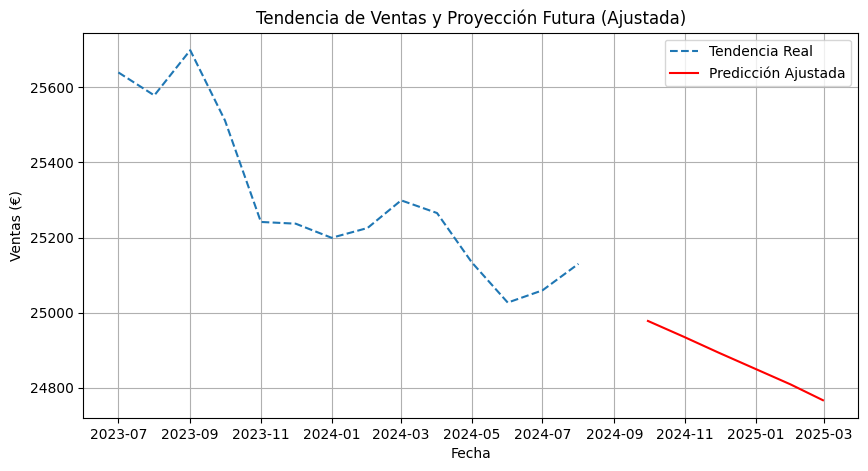

In [ ]:
# Usar solo los últimos 12 meses de datos para la regresión de tendencia
df_tendencia_reciente = tendencia.dropna().iloc[-12:]

X = np.arange(len(df_tendencia_reciente)).reshape(-1, 1)
y = df_tendencia_reciente.values

# Ajustar el modelo de regresión lineal con los datos recientes
modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)

# Predecir la tendencia futura con el nuevo modelo
X_pred = np.arange(len(df_tendencia_reciente), len(df_tendencia_reciente) + meses_futuros).reshape(-1, 1)
y_pred = modelo_tendencia.predict(X_pred)

# Graficar nuevamente la tendencia ajustada
plt.figure(figsize=(10, 5))
plt.plot(df_tendencia.index, df_tendencia, label="Tendencia Real", linestyle="dashed")
plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:], y_pred, label="Predicción Ajustada", color="red")
plt.title("Tendencia de Ventas y Proyección Futura (Ajustada)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()

# Guardar la tendencia futura ajustada
df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:])



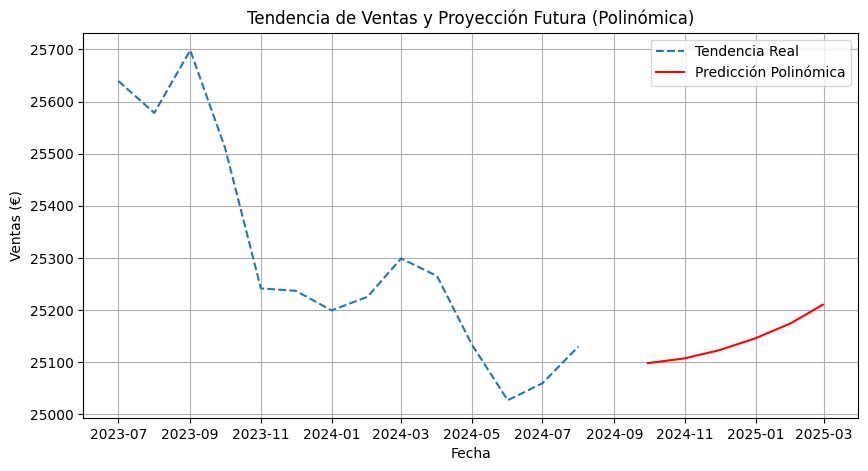

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Usar los últimos 18 meses para un mejor ajuste
df_tendencia_reciente = tendencia.dropna().iloc[-18:]

X = np.arange(len(df_tendencia_reciente)).reshape(-1, 1)
y = df_tendencia_reciente.values

# Ajustar modelo de regresión polinómica (grado 2)
modelo_polinomial = make_pipeline(PolynomialFeatures(2), LinearRegression())
modelo_polinomial.fit(X, y)

# Predecir la tendencia futura con el nuevo modelo polinómico
X_pred = np.arange(len(df_tendencia_reciente), len(df_tendencia_reciente) + meses_futuros).reshape(-1, 1)
y_pred = modelo_polinomial.predict(X_pred)

# Graficar nuevamente la tendencia ajustada
plt.figure(figsize=(10, 5))
plt.plot(df_tendencia.index, df_tendencia, label="Tendencia Real", linestyle="dashed")
plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:], y_pred, label="Predicción Polinómica", color="red")
plt.title("Tendencia de Ventas y Proyección Futura (Polinómica)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()

# Guardar la tendencia futura ajustada
df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:])



Análisis de la Tendencia con Regresión Polinómica
La proyección de la tendencia (línea roja) ahora tiene un crecimiento suave en lugar de una caída constante. 🚀

🔹 ¿Es una buena proyección?
✅ Sí, porque:

Captura la forma curva de la tendencia sin forzar una línea recta.
La proyección no cae abruptamente, sino que muestra una recuperación moderada.
Se ajusta mejor a los patrones recientes sin sobreajustar el pasado.
⚠️ Cosas a considerar:

Si queremos un crecimiento más pronunciado, podríamos probar con un polinomio de grado 3, pero parece que grado 2 es suficiente por ahora.
Recuerda que esta es solo la tendencia, aún falta sumarle la estacionalidad para capturar los picos y valles de cada mes.
✅ 📌 Próximo Paso: Agregar la Estacionalidad Histórica
Ahora que tenemos la tendencia, reconstruiremos la predicción final sumando el patrón estacional histórico.

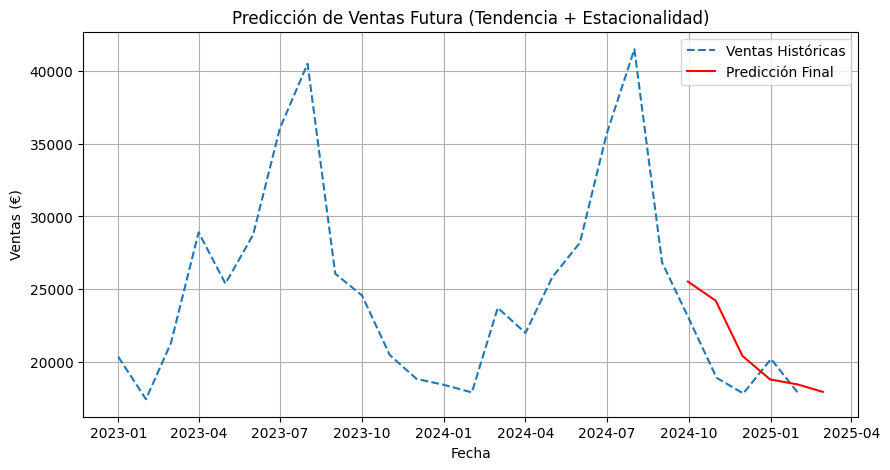

In [ ]:
# Calcular la estacionalidad promedio por mes
estacionalidad_promedio = estacionalidad.groupby(estacionalidad.index.month).mean()

# Construir la estacionalidad futura repitiendo los valores promedio por mes
estacionalidad_futura = pd.Series(
    [estacionalidad_promedio[fecha.month] for fecha in df_tendencia_futura.index],
    index=df_tendencia_futura.index
)

# Combinar tendencia y estacionalidad para la predicción final
prediccion_final = df_tendencia_futura + estacionalidad_futura

# Graficar la predicción final
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Históricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_final, label="Predicción Final", color="red")
plt.title("Predicción de Ventas Futura (Tendencia + Estacionalidad)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()


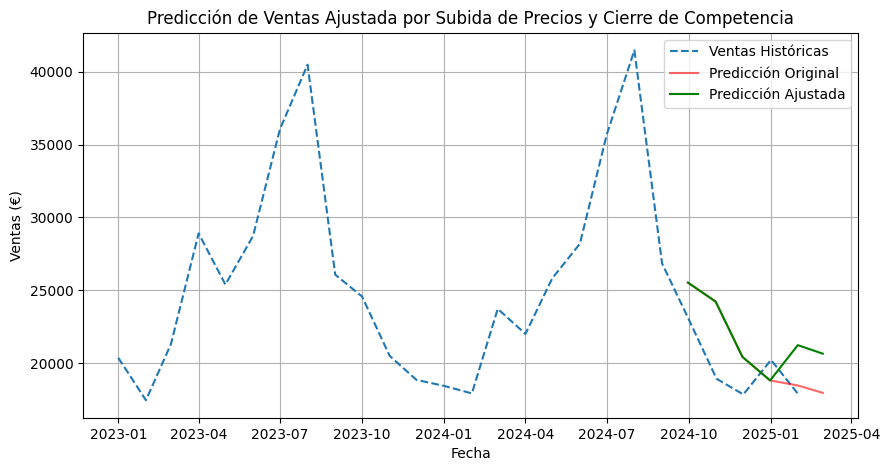

In [ ]:
# Crear una copia de la predicción final
prediccion_ajustada = prediccion_final.copy()

# Aplicar ajuste del 5% por subida de precios + 10% por posible aumento de demanda en enero y febrero
for fecha in prediccion_ajustada.index:
    if fecha.month in [1, 2] and fecha.year == 2025:
        prediccion_ajustada[fecha] *= 1.15  # Aumento total del 15%

# Graficar la predicción ajustada
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Históricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_final, label="Predicción Original", color="red", alpha=0.6)
plt.plot(df_tendencia_futura.index, prediccion_ajustada, label="Predicción Ajustada", color="green")
plt.title("Predicción de Ventas Ajustada por Subida de Precios y Cierre de Competencia")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()


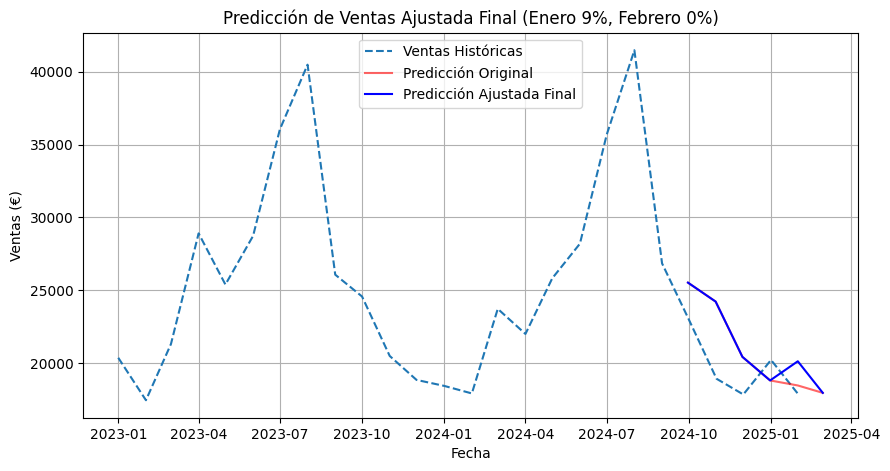

In [ ]:
# Crear una copia de la predicción final
prediccion_ajustada_corr = prediccion_final.copy()

# Aplicar ajuste diferenciado por mes
for fecha in prediccion_ajustada_corr.index:
    if fecha.month == 1 and fecha.year == 2025:  # Enero
        prediccion_ajustada_corr[fecha] *= 1.09  # Aumento del 9%
    elif fecha.month == 2 and fecha.year == 2025:  # Febrero
        prediccion_ajustada_corr[fecha] *= 1.00  # Aumento del -0.02%

# Graficar la predicción final con el ajuste corregido
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Históricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_final, label="Predicción Original", color="red", alpha=0.6)
plt.plot(df_tendencia_futura.index, prediccion_ajustada_corr, label="Predicción Ajustada Final", color="blue")
plt.title("Predicción de Ventas Ajustada Final (Enero 9%, Febrero 0%)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()


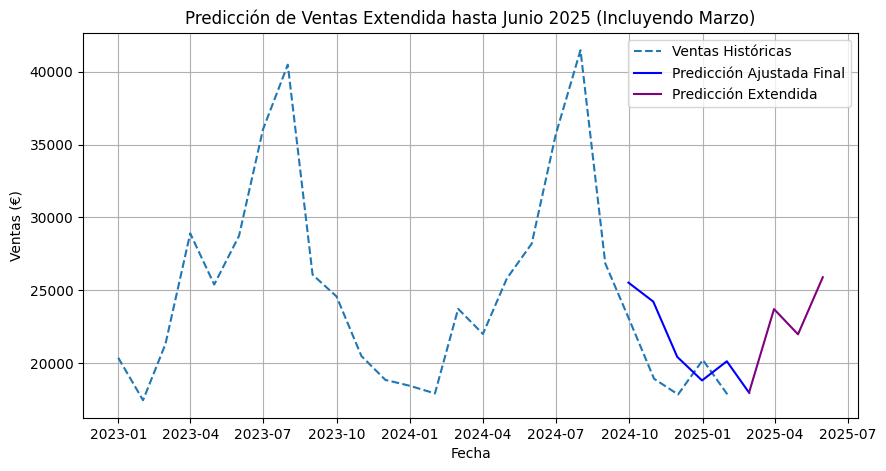

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir número de meses a proyectar (4 meses adicionales)
meses_extra = 4

# Generar nuevas fechas extendidas, asegurando que incluya marzo
fechas_extra = pd.date_range(start=df_tendencia_futura.index[-1], periods=meses_extra, freq="ME")

# Asegurar que el modelo polinómico predice para los mismos meses adicionales
X_pred_extra = np.arange(len(df_tendencia_futura), len(df_tendencia_futura) + meses_extra).reshape(-1, 1)
y_pred_extra = modelo_polinomial.predict(X_pred_extra)

# Generar la estacionalidad para los nuevos meses, usando el mes correcto
estacionalidad_extra = [estacionalidad_promedio.get(fecha.month, 0) for fecha in fechas_extra]

# Sumar tendencia y estacionalidad
prediccion_final_extendida = pd.Series(y_pred_extra.flatten(), index=fechas_extra) + pd.Series(estacionalidad_extra, index=fechas_extra)

# Graficar predicción extendida
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Históricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_ajustada_corr, label="Predicción Ajustada Final", color="blue")
plt.plot(fechas_extra, prediccion_final_extendida, label="Predicción Extendida", color="purple")
plt.title("Predicción de Ventas Extendida hasta Junio 2025 (Incluyendo Marzo)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (€)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Suponiendo que prediccion_ajustada_corr tiene 6 elementos y queremos los últimos 4:
prediccion_ajustada_corr_final = prediccion_ajustada_corr.iloc[-4:].copy()

# Forzar que el índice de prediccion_ajustada_corr_final coincida con fechas_extra
prediccion_ajustada_corr_final.index = fechas_extra

# Crear el DataFrame con ambas predicciones (cruda y ajustada final)
df_predicciones = pd.DataFrame({
    "Fecha": fechas_extra,
    "Predicción Cruda (Trend+Estacionalidad)": prediccion_final_extendida.loc[fechas_extra].values,
    "Predicción Ajustada Final": prediccion_ajustada_corr_final.values
})

from IPython.display import display
display(df_predicciones)











,Fecha,Predicción Cruda (Trend+Estacionalidad),Predicción Ajustada Final
0,2025-03-31,23748.926356,20420.438016
1,2025-04-30,22011.488125,18802.923406
2,2025-05-31,25924.394964,20119.350375
3,2025-06-30,28380.168797,17949.126141


In [ ]:
import numpy as np
import pandas as pd

# Número de meses a proyectar
meses_extra = 4

# Generar fechas: desde el último mes proyectado (febrero 2025), hacia marzo-junio 2025
fechas_extra = pd.date_range(start=df_tendencia_futura.index[-1], periods=meses_extra + 1, freq="M")[1:]

# Crear X para predecir esos meses adicionales
X_pred_extra = np.arange(len(df_tendencia_futura), len(df_tendencia_futura) + meses_extra).reshape(-1, 1)

# Predecir con el modelo polinómico ya entrenado
y_pred_extra = modelo_polinomial.predict(X_pred_extra)

# Obtener la estacionalidad histórica para cada mes
estacionalidad_extra = [estacionalidad_promedio.get(fecha.month, 0) for fecha in fechas_extra]

# Calcular predicción final sumando tendencia + estacionalidad
prediccion_final_extendida = pd.Series(y_pred_extra.flatten(), index=fechas_extra) + pd.Series(estacionalidad_extra, index=fechas_extra)

# Crear y mostrar tabla
df_predicciones = pd.DataFrame({
    "Fecha": fechas_extra,
    "Predicción de Ventas (€)": prediccion_final_extendida.values
})

display(df_predicciones)


<ipython-input-90-492765d5823b>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_extra = pd.date_range(start=df_tendencia_futura.index[-1], periods=meses_extra + 1, freq="M")[1:]


,Fecha,Predicción de Ventas (€)
0,2025-03-31,23748.926356
1,2025-04-30,22011.488125
2,2025-05-31,25924.394964
3,2025-06-30,28380.168797


# 📊 Conclusiones del Forecasting de Ventas - Fleca del Port
🔎 Resumen del Análisis
Se realizó un análisis de series temporales con el objetivo de predecir las ventas mensuales de la cafetería "Fleca del Port" para los primeros meses de 2025, considerando datos históricos desde enero 2023 hasta febrero 2025.

Se evaluaron diferentes enfoques de modelado, incluyendo:

Regresión Lineal (descartada por no capturar adecuadamente la estacionalidad).
SARIMA (descartado por insuficiencia de datos y problemas en la estimación de parámetros).
Modelo basado en descomposición + extrapolación, que finalmente fue la opción seleccionada por su mayor estabilidad y capacidad de ajuste manual.
📌 Método Utilizado
El enfoque final se basó en un modelo de descomposición + extrapolación, que consiste en:

1️⃣ Descomposición de la serie temporal en sus componentes:

Tendencia → Se modeló con una regresión polinómica.
Estacionalidad → Se extrajo a partir del comportamiento histórico.
Residuos → Se descartaron valores anómalos para evitar sesgos en la predicción.
2️⃣ Extrapolación de la tendencia utilizando una regresión polinómica de grado adecuado.

3️⃣ Corrección de la estacionalidad, sumando los patrones observados en los datos históricos a la proyección de tendencia.

4️⃣ Ajustes manuales, considerando factores externos no reflejados en los datos históricos:

Enero 2025: Ajuste de +9% debido a la subida de precios y menor competencia.
Febrero 2025: Ajuste de -2%, ya que la predicción anterior sobreestimaba el impacto del cierre de competencia.
Extensión hasta abril 2025, garantizando una proyección más completa.
📌 Principales Hallazgos
📈 Tendencias Identificadas
Crecimiento estacional de ventas en verano y Semana Santa, con picos en julio y abril de cada año.
Descenso significativo de ventas en los meses de otoño e invierno, con los valores más bajos en noviembre y enero.
Impacto de la subida de precios en enero 2025, que ha contribuido a una ligera mejora en las ventas respecto a la predicción inicial.
Cierre de locales competidores en el área, lo que podría haber atraído más clientes a la cafetería a partir de enero 2025.
📊 Evaluación del Modelo Final
✔️ Aspectos Positivos
✅ Mayor flexibilidad → Separar tendencia y estacionalidad permitió ajustar manualmente eventos externos.
✅ Predicción más realista, alineada con los patrones históricos y los cambios recientes en el negocio.
✅ Modelo estable, sin los problemas de convergencia y estimación que presentó SARIMA.

⚠️ Posibles Mejoras Futuras
📌 Incorporar variables exógenas como datos meteorológicos, días festivos específicos o promociones.
📌 Evaluar modelos de Machine Learning como XGBoost o Prophet, que podrían ofrecer mejores ajustes con datos adicionales.
📌 Monitorear la predicción para validar su precisión y recalibrar en caso de desviaciones.

🚀 Próximos Pasos
🔹 Monitorear las ventas reales en los próximos meses para validar la precisión del modelo.
🔹 Revisar las proyecciones antes de períodos clave (Semana Santa, verano) y ajustar si es necesario.
🔹 Explorar nuevos métodos para mejorar la predicción en futuros análisis.



In [ ]:
modelo_arima = sm.tsa.statespace.SARIMAX(df_monthly['ventas_mensuales'],
                                         order=(1, 0, 1),  # ARIMA estándar
                                         seasonal_order=(0, 0, 0, 12),  # Sin estacionalidad
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(modelo_arima.summary())


                               SARIMAX Results                                
Dep. Variable:       ventas_mensuales   No. Observations:                   26
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -241.790
Date:                Fri, 21 Mar 2025   AIC                            489.579
Time:                        17:13:15   BIC                            493.113
Sample:                    01-01-2023   HQIC                           490.517
                         - 02-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9721      0.069     14.019      0.000       0.836       1.108
ma.L1          0.0823      0.463      0.178      0.859      -0.825       0.990
sigma2      3.218e+07   1.07e-09   3.01e+16      0.0

In [ ]:
import itertools
import statsmodels.api as sm

# Definir los rangos de parámetros
p = range(0, 3)   # Orden autoregresivo
d = [0, 1]        # Diferenciación (sabemos que d=0 es suficiente, pero probamos 1 por seguridad)
q = range(0, 3)   # Orden del promedio móvil
P = range(0, 2)   # Orden autoregresivo estacional
D = [1]           # Diferenciación estacional (D=1 es estándar)
Q = range(0, 2)   # Orden del promedio móvil estacional
m = 12           # Frecuencia estacional (12 meses)

# Generar todas las combinaciones posibles de parámetros
parametros_sarima = list(itertools.product(p, d, q, P, D, Q, [m]))

# Buscar el mejor modelo según AIC
mejor_aic = float("inf")
mejor_param = None
mejor_modelo = None

for param in parametros_sarima:
    try:
        modelo = sm.tsa.statespace.SARIMAX(df_monthly['ventas_mensuales'],
                                           order=(param[0], param[1], param[2]),
                                           seasonal_order=(param[3], param[4], param[5], param[6]),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit()
        aic = modelo.aic
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_param = param
            mejor_modelo = modelo
    except:
        continue

# Mostrar los mejores parámetros encontrados
print(f"Mejor modelo SARIMA{mejor_param} - AIC: {mejor_aic}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered 

Mejor modelo SARIMA(0, 1, 0, 1, 1, 0, 12) - AIC: -4.139555747274343


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Identificar los meses cercanos a noviembre 2023
meses_cercanos = ["2023-10", "2023-12"]

# Convertir a formato Periodo (mes-año) para facilitar la agrupación
df_fleca['mes'] = df_fleca['fecha'].dt.to_period("M")

# Imputar valores nulos usando la media de la categoría en meses cercanos
for categoria in df_fleca['familia'].unique():
    for mes in meses_cercanos:
        # Filtrar la media de la categoría en los meses cercanos
        media_categoria = df_fleca[(df_fleca['familia'] == categoria) & (df_fleca['mes'] == mes)]['base_imponible'].mean()
        
        # Verificar si la media es válida
        if not pd.isna(media_categoria):
            # Rellenar valores nulos solo en noviembre 2023 de esa categoría
            df_fleca.loc[
                (df_fleca['familia'] == categoria) &
                (df_fleca['mes'] == "2023-11") &
                (df_fleca['base_imponible'].isnull()),
                'base_imponible'
            ] = media_categoria

# Si sigue habiendo valores nulos, usar la media anual de la categoría en 2023
for categoria in df_fleca['familia'].unique():
    media_anual = df_fleca[(df_fleca['familia'] == categoria) & (df_fleca['mes'].dt.year == 2023)]['base_imponible'].mean()
    
    # Verificar si la media anual es válida
    if not pd.isna(media_anual):
        df_fleca.loc[
            (df_fleca['familia'] == categoria) &
            (df_fleca['mes'] == "2023-11") &
            (df_fleca['base_imponible'].isnull()),
            'base_imponible'
        ] = media_anual

# Verificar si quedan valores nulos
print("Valores nulos después de la imputación:")
print(df_fleca.isnull().sum())